## spliting the data

1) 목표 데이터와 feature 구분
- 목표데이터 : left(퇴직)
- feature : 목표데이터를 설명해줄 나머지 데이터들

2) Train 데이터와 test 데이터의 분리 : sklearn 패키지 사용
- train : 모델을 만드는 데 사용하는 데이터
- test : 모델을 검증하는 데 사용하는 데이터

In [6]:
# ipynb 파일이 분리되어 있는 관계로 이전 파일의 실행 내역 복사

import pandas as pd
data = pd.read_csv("turnover.csv")

data.salary = data.salary.astype('category')
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])
data.salary = data.salary.cat.codes

departments = pd.get_dummies(data.department)
departments = departments.drop("technical", axis=1)
data = data.drop("department", axis=1)
data = data.join(departments)

#### 목표데이터와 features 데이터 정의

In [7]:
# 목표데이터와 feature데이터 정의
target = data.left
features = data.drop("left", axis=1)

# 데이터셋을 train과 test로 나눠주는 함수(sklearn.model_selection) 호출
from sklearn.model_selection import train_test_split

# train_test_split 함수를 이용해서 목표데이터와 feature데이터를 나누고 테스트 샘플을 25%로 정의
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size=0.25)

## Python에서의 Classification 방법

- Logistic regression
- Support Vector Machines
- Neural Networks
- Decision -> 본 실습에서 사용
- 기타 알고리즘

#### overfitting이란?
모델(예, Classification)이 현재의 데이터에는 잘 적용되지만 새로운 데이터(테스트데이터)를 대상으로 예측할 때 발생하는 오류

### splitting rule
- gini = 2 x p x (1-p)
- entropy = -p x log(p)-(1-p) x log(1-p)

### Gini index 계산

Decision tree 알고리즘은 데이터 분할을 가능한 한 순수하게 할 수 있도록 하는 방법으로, 개별 그룹의 샘플 데이터 비율을 기초로 계산됨.

In [2]:
# 재직자와 퇴직자 수
stayed = 37
left = 1138

# 재직자와 퇴직자 합계
total = stayed + left

# gini index
gini = 2*(stayed/total)*(left/total)
print(gini)

0.060995563603440474


### Tree 분리하기

Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.</p>
예)
1. Toal set : 100명의 사례 -> 40명 퇴직, 60명 재직</p>
2. Gini = 2 x 0.4 x 0.6 = 0.48</p>

3. 분리 규칙(기준) : 만족도 > 0.8
  - Left branch(YES) --> 50명: 모두 재직
  - Gini = 2 x 1 x 0 = 0
  - Right branch(NO) --> 50명: 40명 퇴직, 10명 재직
  - Gini = 2 x 0.4 x 0.1 = 0.08

In [4]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


### train 데이터와 test 데이터 fitting

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

# train 데이터의 fitting 작업 수행
model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### 예측 정확도(accuracy) 점검

In [14]:
# train 데이터에 대한 예측결과의 정확성을 점수로 환산
model.score(features_train, target_train)*100

100.0

In [15]:
# test 데이터에 대한 예측결과의 정확성을 점수로 환산
model.score(features_test, target_test)*100

98.213333333333324

### Decision tree 해석 - Visualization

1. decision tree를 내 작업 디렉토리로 추출(export)한다.
2. 파일을 열어서 내용을 복사한다.
3. www.webgraphviz.com에 붙여넣는다.

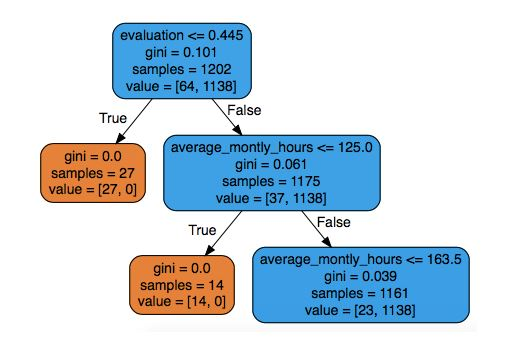

#### decision tree 생성하고 내려받기

In [ ]:
# tree graphical visualization 호출
from sklearn.tree import export_graphviz

# 목표데이터에 features를 맞추기 위해 Decision Tree 모델 적용
model.fit(features_train, target_train)

# tree를 dot 파일로 추출
export_graphviz(model, "tree.dot")